## Final Project - Data Analysis and Visualization

**Group Members:**
- Benjamin Francis Abadila
- Angelo Dela Paz
- Carl Mitzchel Padua
- Edjin Jerney Payumo
- Levin Jacob Sta. Cruz

---
### I. Data Loading

In [1]:
# Importing Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the 2023 FIES Dataset
fies_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')

C:\Users\Gelo\AppData\Local\Temp\ipykernel_16648\2210770801.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fies_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')


#### Preliminary Data Inspection

In [3]:
# Displaying the first 10 rows of the dataset
pd.set_option('display.max_columns', None)
fies_23.head(10)

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.5,119000,0,119000,0,461000,10000,0,0,0,0,0,4760,310.0,0,0,0,0,0,0,0,0,0,0,0,0,18830.0,57120.0,46820.0,2540.0,1734.0,2410.0,8000.0,1835.0,2244.0,0.0,2250.0,0.0,0.0,1950.0,1820.0,0.0,0.0,0.0,0.0,0,0,147553.0,14000.0,161553.0,510,36840,0,12000,0,12000,5585,1410,7864,3060,0,0,0,8420,0,0,3700,0,0,67389.0,607070.0,228942.0,228942.0,0,607070.0,2,88.543663,229.392223,2,242828.000000,10,10,10,10,10,1
1,1,28,2,2800,6.0,154400,0,154400,0,142000,43000,6000,0,0,0,0,2790,1790.0,0,0,0,0,0,0,0,44000,0,0,44000,0,36323.0,50206.0,43405.0,12500.0,2340.0,4710.0,12115.0,1230.0,2930.0,702.0,5025.0,0.0,960.0,5850.0,6162.0,0.0,1950.0,0.0,0.0,0,0,184458.0,12800.0,197258.0,2010,32080,0,18000,0,18000,12850,1610,19850,18800,75,50,11880,33164,30700,0,800,600,0,165819.0,411980.0,363077.0,363677.0,0,411980.0,2,88.543663,550.541336,2,68663.335938,5,5,2,2,5,1
2,1,28,3,2800,3.5,683452,0,683452,0,37000,28000,9000,0,0,0,0,940,41820.0,0,0,0,0,0,0,0,0,0,0,0,0,27770.0,54160.0,36440.0,11955.0,2364.0,5360.0,13805.0,1470.0,2580.0,0.0,1860.0,0.0,0.0,3900.0,3120.0,0.0,0.0,0.0,0.0,0,0,164784.0,11500.0,176284.0,2440,52860,0,18000,0,18000,12810,2910,29620,12894,0,0,85909,14050,108000,1500,17200,42709,0,340193.0,818212.0,516477.0,559186.0,0,818212.0,2,88.543663,321.149113,2,233774.859375,10,10,10,10,10,1
3,1,28,4,2800,2.5,48200,0,48200,10000,55000,5000,9000,0,0,0,0,2360,24738.0,24240,0,0,0,62000,0,0,0,0,0,86240,0,18272.0,21220.0,20380.0,10490.0,1836.0,2780.0,8240.0,1060.0,1586.0,552.0,1910.0,0.0,0.0,2550.0,1820.0,0.0,0.0,0.0,0.0,0,0,92696.0,10000.0,102696.0,1950,40350,0,18000,0,18000,5418,5054,10560,7800,0,0,0,5690,0,0,920,0,0,77742.0,258538.0,180438.0,180438.0,0,258538.0,2,88.543663,229.392223,2,103415.203125,7,8,5,5,8,1
4,1,28,5,2800,3.0,400994,0,400994,0,108000,5000,0,0,0,0,0,220,850.0,17660,0,0,0,0,0,0,0,0,0,17660,0,27020.0,64250.0,45770.0,3320.0,1056.0,2020.0,7145.0,1150.0,2140.0,552.0,2130.0,0.0,0.0,3900.0,2730.0,0.0,0.0,0.0,0.0,0,0,163183.0,8000.0,171183.0,1700,62250,0,18000,0,18000,14920,2565,48960,25860,220,0,44760,13620,0,0,4400,46524,0,219255.0,550724.0,390438.0,436962.0,2000,552724.0,2,88.543663,275.270668,2,183574.671875,9,10,9,9,10,1
5,1,28,6,2800,4.0,0,0,0,0,180000,0,0,0,0,0,0,140,2530.0,0,0,0,0,80800,0,0,72000,0,0,152800,0,29402.0,45529.0,24450.0,9086.0,1870.0,2460.0,10265.0,3800.0,2687.0,552.0,2250.0,0.0,1886.0,4550.0,3640.0,0.0,0.0,0.0,0.0,0,0,142427.0,19800.0,162227.0,2090,65160,0,18000,0,18000,8886,4050,27730,13494,4250,500,6000,10630,2500,0,0,16200,0,145290.0,353470.0,307517.0,323717.0,0,353470.0,2,88.543663,367.027557,2,88367.500000,7,7,4,4,7,1
6,1,28,7,2800,3.5,0,0,0,0,181000,23000,9000,0,24000,0,0,280,40675.0,45600,0,0,0,0,0,0,0,0,0,45600,0,21707.0,37808.0,23000.0,16050.0,2394.0,3795.0,10635.0,2120.0,5247.0,0.0,1350.0,0.0,0.0,3250.0,3850.0,0.0,1124.0,0.0,0.0,0,0,131206.0,13800.0,145006.0,1550,44500,0,21000,0,21000,9416,32602,15760,7200,4000,0,0,9666,48000,0,0,0,0,173818.0,344555.0,318824.0,318824.0,3200,347755.0,2,88.543663,321.149113,2,98444.289063,7,7,5,5,7,1
7,1,28,8,2800,2.0,0,0,0,0,60000,14000,6000,0,0,0,0,800,3085.0,24850,0,0,0,0,0,106440,0,0,0,131290,0,18972.0,24270.0,26380.0,1416.0,942.0,1185.0,8105.0,1090.0,141

In [4]:
# Displaying the shape of the dataset
fies_23.shape

(163268, 90)

In [5]:
# Displaying the columns of the dataset
fies_23.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [6]:
# Displaying the data types of the columns and the number of non-null values
fies_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        163268 non-null  int64  
 1   W_PROV                        163268 non-null  int64  
 2   SEQ_NO                        163268 non-null  int64  
 3   RPROV                         163268 non-null  int64  
 4   FSIZE                         163268 non-null  float64
 5   REG_SAL                       163268 non-null  int64  
 6   SEASON_SAL                    163268 non-null  int64  
 7   WAGES                         163268 non-null  int64  
 8   NETSHARE                      163268 non-null  int64  
 9   CASH_ABROAD                   163268 non-null  int64  
 10  CASH_DOMESTIC                 163268 non-null  int64  
 11  RENTALS_REC                   163268 non-null  int64  
 12  INTEREST                      163268 non-nul

`Observation:` All the columns have the same rows and no non-null data were found. All columns are also numeric (int64/float64) except for the `TOTDIS` column which is `object` dtype

In [7]:
# Displaying the summary statistics of the dataset
fies_23.describe()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
count,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000
mean,9.343821,45.666328,81634.500000,4574.490751,4.135504,1.495268e+05,2.872110e+04,1.782479e+05,1.678624e+03,2.422786e+04,1.625567e+04,2.087703e+03,261.068783,8.917411e+03,9.279524e+02,334.375260,3147.782842,6.229320e+03,1.349645e+04,2.298986e+03,4.626744e+03,387.405021,2.544389e+04,2.398009e+03,6.584374e+03,5.824782e+03,3.672963e+02,3.758046e+02,6.181191e+04,8.169978,27286.062891,16053.257366,14394.006695,6144.197778,1712.811002,4601.016959,7037.525935,2141.598779,4130.657394,711.642792,2217.816260,122.737804,438.272914,1900.274496,1187.452304,79.535181,1279.174387,1983.709162,67.003924,19.450805,1.171387,9.015887e+04,11548.751406,1.017076e+05,4.900740e+03,5.409333e+04,3.653566e+03,2.801967e+04,8.943057e+01,3.176266e+04,6.315285e+03,6.971786e+03,1.581311e+04,7888.639139,1.988345e+03,8.202996e+03,6376.147353,9065.431358,5.097815e+03,6275.710347,4.889744e+03,2.743421e+04,218.148829,1.414477e+05,3.321473e+05,2.431553e+05,1.010574e+04,3.422530e+05,573.167081,168.310355,691.456715,1.524383,9.530256e+04,5.193816,5.494518,5.564728,5.483561,5.490482,9.713183
std,4.753706,24.759798,47131.556212,2482.168879,1.966900,2.384600e+05,6.904034e+04,2.494863e+05,1.239273e+04,8.593570e+04,2.991219e+04,2.482738e+04,3388.956853,6.055216e+04,6.751070e+04,5839.103922,6381.121388,2.155790e+04,4.460068e+04,4.009795e+04,2.985207e+04,5000.560669,2.251064e+05,3.531579e+04,3.467995e+04,8.237168e+04,1.672914e+04,1.802239e+04,2.660405e+05,738.982873,12875.671564,13694.003058,10333.798670,6312.403759,1549.350682,4226.019431,5509.888624,2031.424024,6184.097005,1149.474516,2066.748378,518.245413,1170.879435,2127.917027,1353.817982,550.259214,2686.722445,4540.873882,489.885721,226.289097,68.121341,4.494110e+04,19540.102473,5.493516e+04,7.662093e+03,5.933142e+04,1.790243e+04,4.143742e+04,6.836886e+03,4.422733e+04,1.575241e+04,2.631806e+04,2.123939e+04,8947.522999,9.025928e+03,2.421281e+04,17194.193854,10490.738724,3.698498e+04,13899.963545,2.659590e+04,1.752157e+05

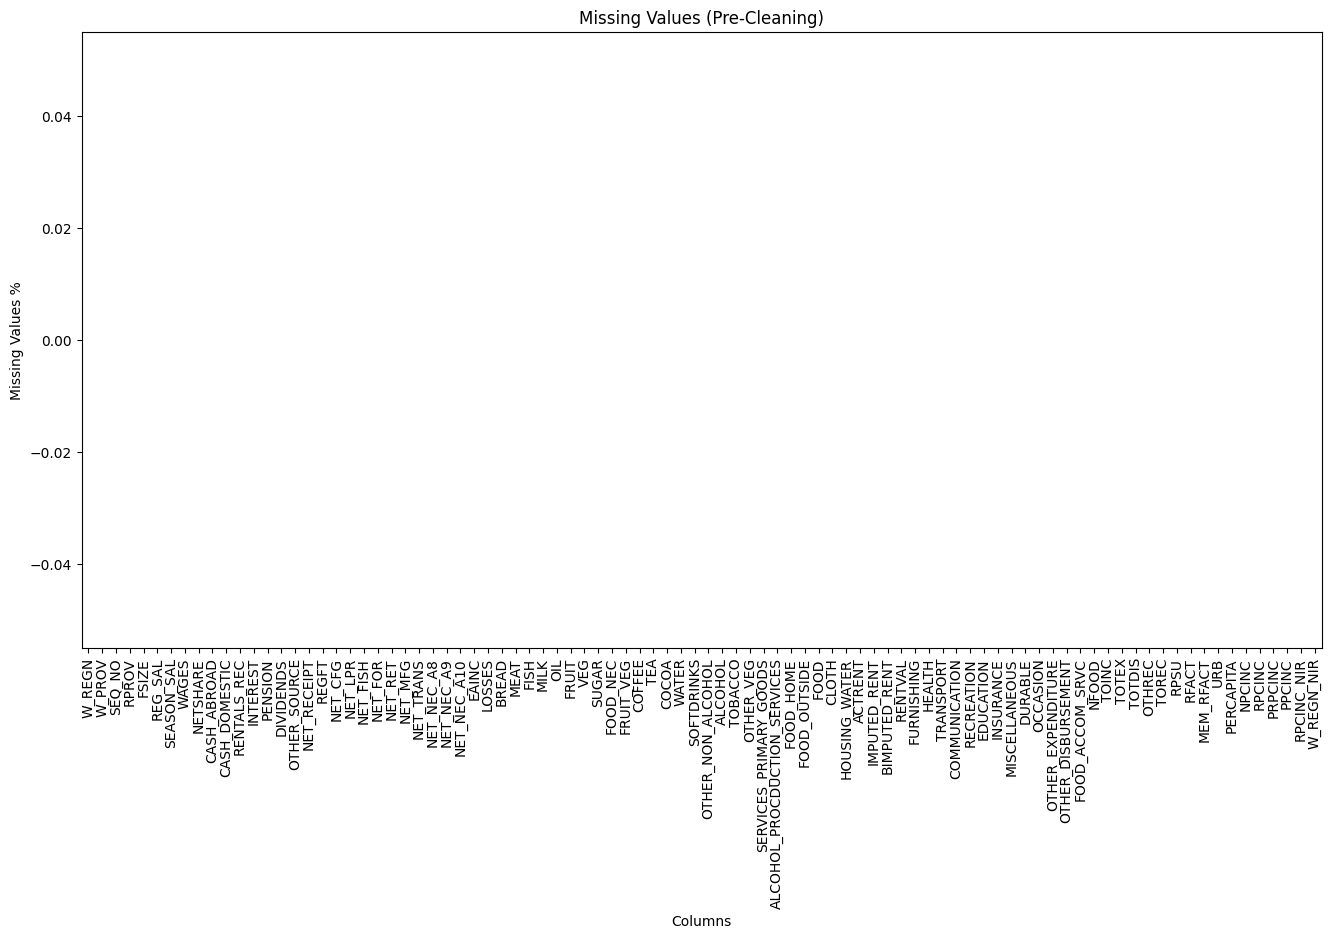

In [8]:
### Displaying the missing values in the dataset

# Calculating the Missing Values % contribution in DF
df_null = round(100*(fies_23.isnull().sum())/len(fies_23), 2)

# Plotting the df_null
plt.figure(figsize=(16,8))
sns.barplot(x=df_null.index, y=df_null.values, alpha=0.8)
plt.title('Missing Values (Pre-Cleaning)')
plt.ylabel('Missing Values %')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

> No missing values were identified

In [9]:
# Identifying duplicate rows using `duplicated()` method
duplicate_rows = fies_23[fies_23.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [10]:
# Identifying duplicate rows by comparing total rows with unique rows
total_rows = fies_23.shape[0]
unique_rows = fies_23.drop_duplicates().shape[0]
duplicate_rows = total_rows - unique_rows

print(f"Total rows: {total_rows}")
print(f"Unique rows: {unique_rows}")
print(f"Duplicate rows: {duplicate_rows}")


Total rows: 163268
Unique rows: 163268
Duplicate rows: 0


> No duplicate values were identified

In [11]:
# Identify column that are non-numeric
fies_23.describe(include='O')

,TOTDIS
count,163268
unique,144056
top,
freq,7732


`'TOTDIS'` is the only column with dataype `object`, it should also be numerical like the rest

---
### II. Data Preprocessing

#### A. Data Cleaning

Correcting Data Types

In [12]:
print("Column Dtype: ",fies_23['TOTDIS'].dtype)
print("Total Rows", fies_23['TOTDIS'].count())
print("Unique Rows",fies_23['TOTDIS'].nunique())

pd.to_numeric(fies_23['TOTDIS'], errors='coerce')
invalid_values = fies_23['TOTDIS'][pd.to_numeric(fies_23['TOTDIS'], errors='coerce').isna()]
print(invalid_values.unique())

Column Dtype:  object
Total Rows 163268
Unique Rows 144056
['           ']


`Observation:` Despite having no actual missing values, the `TOTDIS` column contains rows that only have empty strings or whitespaces ' ' which may have caused it to become object Dtype

In [13]:
whitespace_rows = fies_23['TOTDIS'].str.strip().eq('')
print("Rows with only empty whitespaces: ", whitespace_rows.sum())


Rows with only empty whitespaces:  7732
 7732


> `TOTDIS` contains 7732 rows with whitespaces. However, these could be resolved since `TOTDIS` = `TOTEX` + `OTHER_DISBURSEMENT`

In [14]:
# Dropping Unnecessary Columns
cleaned_fies = fies_23.copy()

In [15]:
### Verify that `TOTDIS` = `TOTEX` + `OTHER_DISBURSEMENT`

# Replace whitespace or empty strings with NaN
cleaned_fies['TOTDIS'] = cleaned_fies['TOTDIS'].replace(r'^\s*$', np.nan, regex=True)
cleaned_fies['TOTDIS'] = pd.to_numeric(cleaned_fies['TOTDIS'], errors='coerce')

# Compute a temporary 'TOTDIS' column for verification
temp_cleaned_fies = cleaned_fies.copy()
temp_cleaned_fies['CALC_TOTDIS'] = cleaned_fies['TOTEX'] + cleaned_fies['OTHER_DISBURSEMENT']

# Identify rows where the computed value differs from the existing value
discrepancies = temp_cleaned_fies[temp_cleaned_fies['TOTDIS'].round() != temp_cleaned_fies['CALC_TOTDIS'].round()]
print(f"Number of discrepancies: {discrepancies.shape[0]}")

discrepancies[['TOTEX', 'OTHER_DISBURSEMENT', 'TOTDIS', 'CALC_TOTDIS']]

Number of discrepancies: 7732


,TOTEX,OTHER_DISBURSEMENT,TOTDIS,CALC_TOTDIS
47648,42479.0,0,NaN,42479.0
47649,185212.0,0,NaN,185212.0
47650,198966.0,0,NaN,198966.0
47651,62612.0,15000,NaN,77612.0
47652,234514.0,0,NaN,234514.0
...,...,...,...,...
148931,177394.0,84000,NaN,261394.0
148932,1453596.0,0,NaN,1453596.0
148933,251941.0,0,NaN,251941.0
148934,117032.0,0,NaN,117032.0


> Since the only discrepancies are the rows missing values. We can clean the data by recomputing their 'TOTDIS'

In [16]:
cleaned_fies['TOTDIS'] = cleaned_fies['TOTEX'] + cleaned_fies['OTHER_DISBURSEMENT']
cleaned_fies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        163268 non-null  int64  
 1   W_PROV                        163268 non-null  int64  
 2   SEQ_NO                        163268 non-null  int64  
 3   RPROV                         163268 non-null  int64  
 4   FSIZE                         163268 non-null  float64
 5   REG_SAL                       163268 non-null  int64  
 6   SEASON_SAL                    163268 non-null  int64  
 7   WAGES                         163268 non-null  int64  
 8   NETSHARE                      163268 non-null  int64  
 9   CASH_ABROAD                   163268 non-null  int64  
 10  CASH_DOMESTIC                 163268 non-null  int64  
 11  RENTALS_REC                   163268 non-null  int64  
 12  INTEREST                      163268 non-nul

> The `'TOTDIS'` column now have 0 null values and have correct Dtype

#### B. Exploratory Data Analysis

In [17]:
cleaned_fies.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [18]:
cleaned_fies.shape

(163268, 90)

#### C. Data Wrangling

In [19]:
# Drop Entrepreneurial Activity Component Columns
# The column EAINC, which is the total of these components will be used instead
cleaned_fies.drop(columns=[
    'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 
    'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 
    'NET_NEC_A9', 'NET_NEC_A10'
], inplace=True)


In [20]:
# Drop Food Component Columns
# The column FOOD, which is the total of these components will be used instead
cleaned_fies.drop(columns=[
    'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 
    'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 
    'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 
    'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 
    'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 
    'FOOD_HOME', 'FOOD_OUTSIDE'
], inplace=True)

In [21]:
# Drop Non-Food Component Columns
# The column NFOOD, which is the total of these components will be used instead
cleaned_fies.drop(columns=[
    'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 
    'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 
    'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 
    'OTHER_EXPENDITURE'
], inplace=True)

In [22]:
# Drop Other Unnecessary Columns
cleaned_fies.drop(columns=[
    'RPROV','WAGES','LOSSES', 'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT',
    'FOOD_ACCOM_SRVC', 'RPSU', 'RFACT', 'MEM_RFACT', 'NPCINC', 
    'RPCINC', 'PRPCINC', 'PPCINC', 'RPCINC_NIR', 
    'W_REGN_NIR'
], inplace=True)


In [23]:
cleaned_fies.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST',
       'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'EAINC',
       'FOOD', 'RENTVAL', 'OTHER_DISBURSEMENT', 'NFOOD', 'TOINC', 'TOTEX',
       'TOTDIS', 'OTHREC', 'TOREC', 'URB', 'PERCAPITA'],
      dtype='object')

In [24]:
# Standardize Column Names
cleaned_fies.rename(
    columns={
        "W_REGN": "REGION",
        "W_PROV": "PROVINCE",
        "SEQ_NO": "FAMILY_ID",
        "FSIZE": "FAMILY_SIZE",
        "NETSHARE": "NET_SHARE",
        "OTHER_SOURCE": "OTHER_INCOME_SOURCE",
        "REGFT": "GIFT_RECEIPTS",
        "EAINC": "ENTREP_INCOME",
        "FOOD": "FOOD_EXPENSES",
        "NFOOD": "NON_FOOD_EXPENSES",
        "TOINC": "TOTAL_INCOME",
        "TOTEX": "TOTAL_EXPENSES",
        "TOTDIS": "TOTAL_DISBURSEMENTS",
        "OTHREC": "OTHER_RECEIPTS",
        "TOREC": "TOTAL_RECEIPTS",
        "URB": "AREA_CLASS",
        "PERCAPITA": "PCAPITA_INCOME",
    },
    inplace=True,
)

In [25]:
cleaned_fies.shape

(163268, 28)

In [26]:
cleaned_fies.columns

Index(['REGION', 'PROVINCE', 'FAMILY_ID', 'FAMILY_SIZE', 'REG_SAL',
       'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
       'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS',
       'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 'ENTREP_INCOME',
       'FOOD_EXPENSES', 'RENTVAL', 'OTHER_DISBURSEMENT', 'NON_FOOD_EXPENSES',
       'TOTAL_INCOME', 'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS',
       'OTHER_RECEIPTS', 'TOTAL_RECEIPTS', 'AREA_CLASS', 'PCAPITA_INCOME'],
      dtype='object')

#### D. Data Engineering

In [27]:
poverty_threshold = 13873 * 12  # Official poverty threshold (Annual)

def classify_income(row):
    total_income = row['TOTAL_INCOME']
    if total_income < poverty_threshold:
        return 'Poor'
    elif total_income < 2 * poverty_threshold:
        return 'Low income'
    elif total_income < 4 * poverty_threshold:
        return 'Lower-middle income'
    elif total_income < 7 * poverty_threshold:
        return 'Middle income'
    elif total_income < 12 * poverty_threshold:
        return 'Upper-middle income'
    elif total_income < 20 * poverty_threshold:
        return 'Upper income'
    else:
        return 'Rich'

cleaned_fies['SOCIAL_CLASS'] = cleaned_fies.apply(classify_income, axis=1)
print(cleaned_fies[['TOTAL_INCOME', 'SOCIAL_CLASS']].head())


   TOTAL_INCOME         SOCIAL_CLASS
0      607070.0  Lower-middle income
1      411980.0  Lower-middle income
2      818212.0        Middle income
3      258538.0           Low income
4      550724.0  Lower-middle income


> The `TOTAL_INCOME` column should be removed as they have direct correlation to the social class

---
### III. Supervised Machine Learning Model

---
### IV. Recommendations